In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [235]:
df=pd.read_csv(r"G:\LILTHOMA\Learn\Internships\Mentoress\Machine Learning Internship MIP-ML-11\Market Price Prediction\MarketPricePrediction.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [236]:
df['date']=pd.to_datetime(df['date'])

In [237]:
# What no of  all the markets present
print("What no of  all the markets present : ",df['market'].nunique())
print("What no of  all the city present : ",df['city'].nunique())
print("What no of  all the states present : ",df['state'].nunique())
print("No of Duplicates : ",df.duplicated().sum())
print("Range of years : ",(max(df.year)-min(df.year)))
print("Oldest Year preset :",min(df.year))
print("Latest Year preset :",max(df.year))
print("All present states : \n",df['state'].unique())

What no of  all the markets present :  120
What no of  all the city present :  117
What no of  all the states present :  21
No of Duplicates :  0
Range of years :  20
Oldest Year preset : 1996
Latest Year preset : 2016
All present states : 
 ['PB' 'UP' 'GUJ' 'MS' 'RAJ' 'KNT' 'MP' 'OR' 'BHR' 'WB' 'CH' 'TN' 'DEL'
 'ASM' 'AP' 'JK' 'HR' 'KER' 'JH' 'HP' 'KEL']


In [272]:
bangalore_df=df[df['market']=="BANGALORE"]

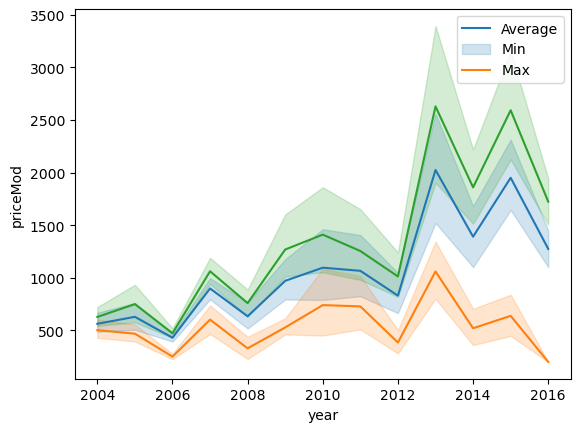

In [273]:
sn.lineplot(y=bangalore_df.priceMod,x=bangalore_df.year)
sn.lineplot(y=bangalore_df.priceMin,x=bangalore_df.year)
sn.lineplot(y=bangalore_df.priceMax,x=bangalore_df.year)
plt.legend(["Average","Min","Max"])
plt.show()

In [274]:
bangalore_df.index=bangalore_df.date

<Axes: xlabel='date'>

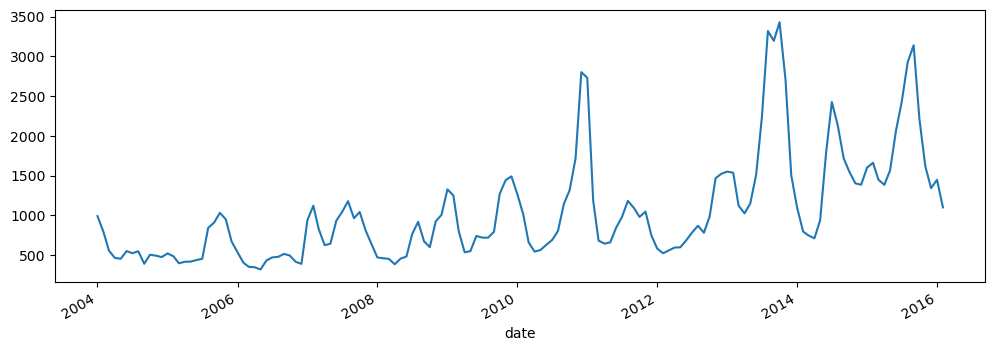

In [275]:
bangalore_df["priceMod"].plot(figsize=(12,4))

<Axes: xlabel='date'>

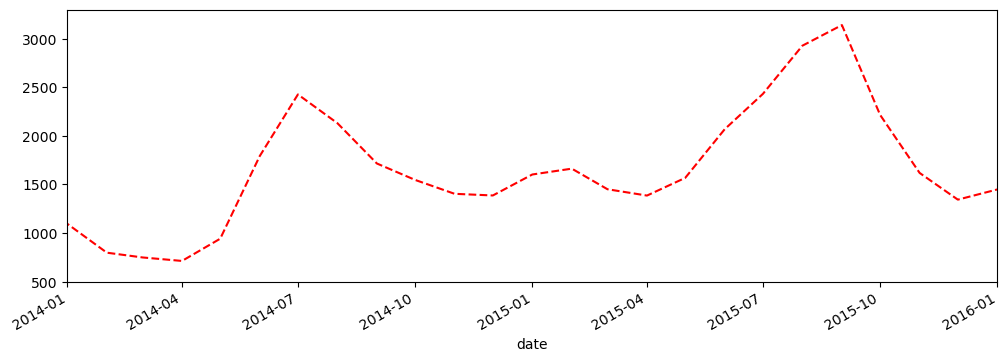

In [276]:
bangalore_df["priceMod"].plot(xlim=["2014-01-01","2016-01-01"],ylim=[500,3300],figsize=(12,4),c="red",ls="--")

In [277]:
date=bangalore_df['date']
bangalore_df.drop('date',axis=1,inplace=True)

In [293]:
bangalore_df=bangalore_df.sort_values(by="year").reset_index()
bangalore_df.set_index('date',drop=True,inplace=True)

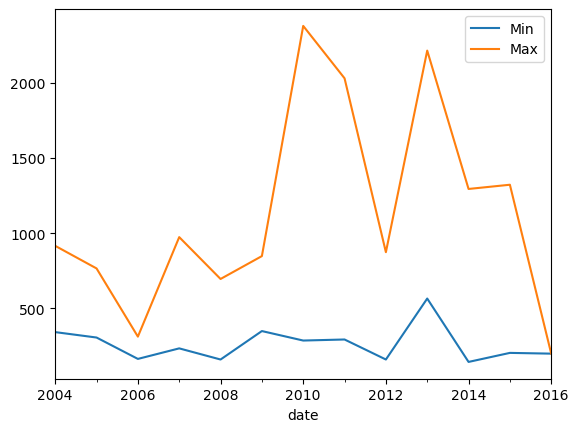

In [309]:
bangalore_df.resample(rule="A").min()['priceMin'].plot()
bangalore_df.resample(rule="A").max()['priceMin'].plot()
plt.legend(["Min","Max"])

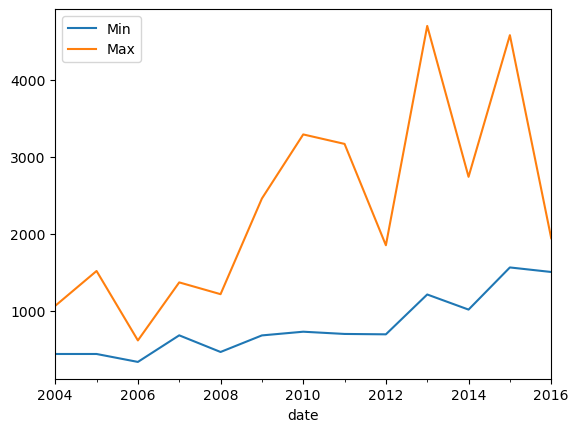

In [310]:
bangalore_df.resample(rule="A").min()['priceMax'].plot()
bangalore_df.resample(rule="A").max()['priceMax'].plot()
plt.legend(["Min","Max"])

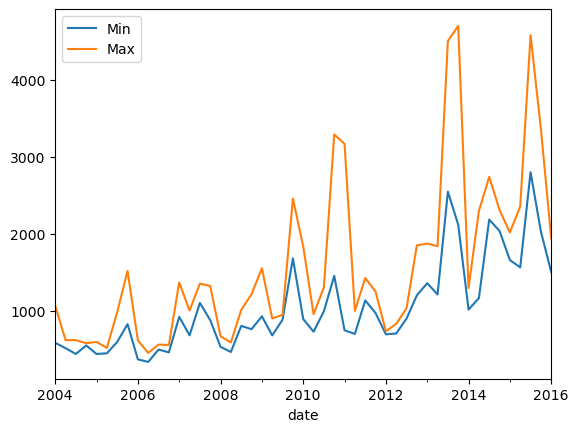

In [311]:
#Year rend frequence  :A
#Quaterly frequency   :QS
#Businsess end        :BA
bangalore_df.resample(rule="QS").min()['priceMax'].plot()
bangalore_df.resample(rule="QS").max()['priceMax'].plot()
plt.legend(["Min","Max"])

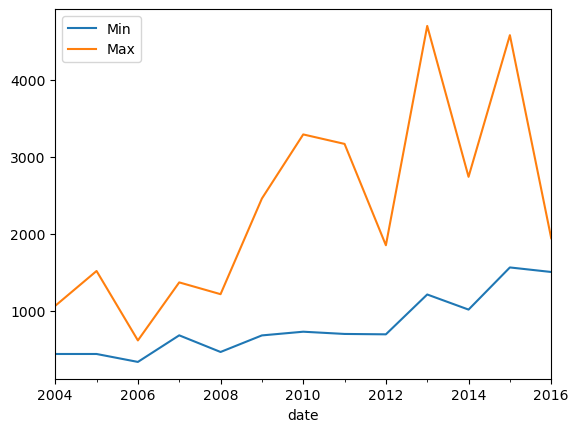

In [312]:
#Year rend frequence  :A
#Quaterly frequency   :QS
#Businsess end        :BA
bangalore_df.resample(rule="BA").min()['priceMax'].plot()
bangalore_df.resample(rule="BA").max()['priceMax'].plot()
plt.legend(["Min","Max"])

<Axes: xlabel='date'>

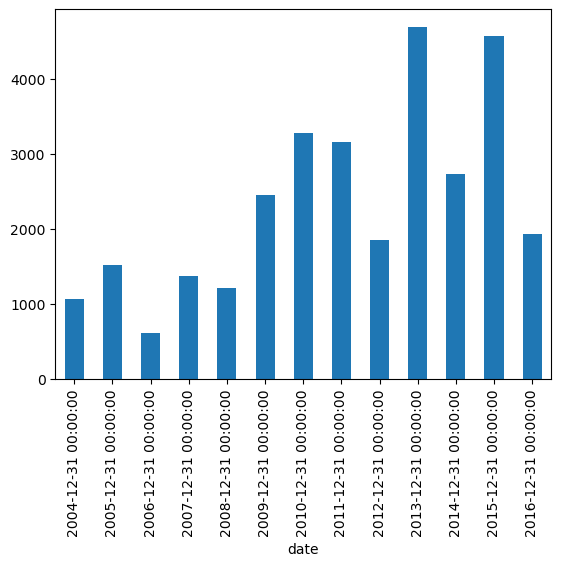

In [314]:
bangalore_df.resample(rule="A").max()['priceMax'].plot(kind="bar")

<Axes: xlabel='date'>

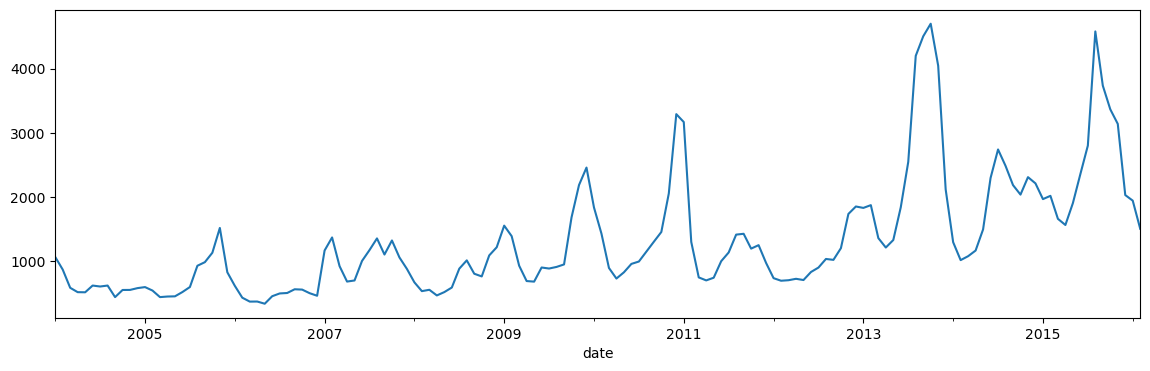

In [317]:
bangalore_df.resample(rule="M").max()['priceMax'].plot(figsize=(14,4))

<Axes: xlabel='date'>

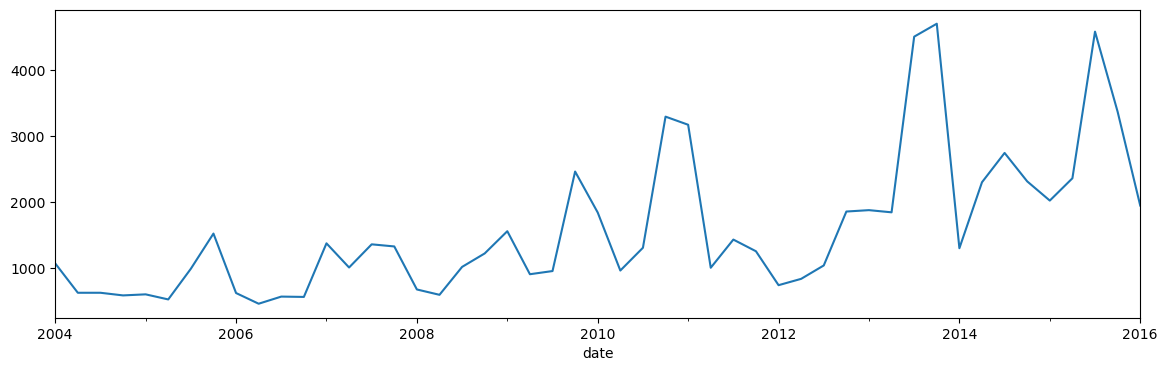

In [318]:
bangalore_df.resample(rule="QS").max()['priceMax'].plot(figsize=(14,4))

<Axes: xlabel='date'>

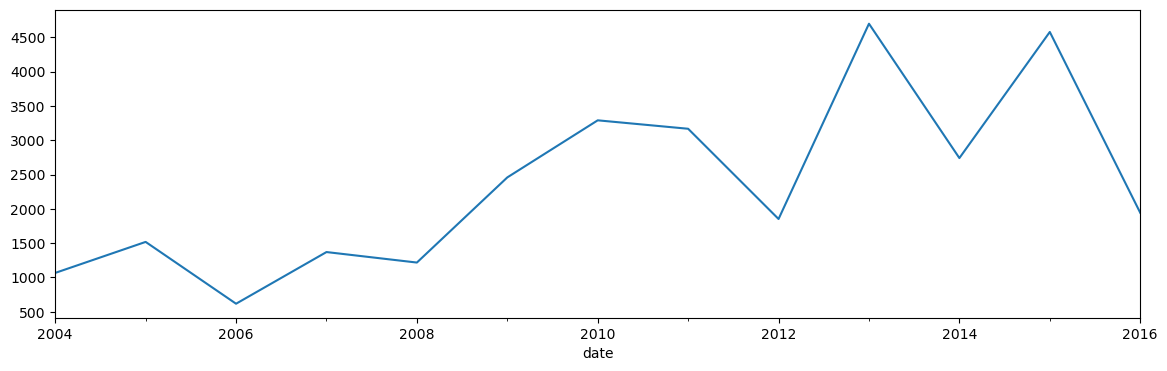

In [319]:
bangalore_df.resample(rule="A").max()['priceMax'].plot(figsize=(14,4))

In [321]:
bangalore_df['priceMax'].rolling(3).mean().head(10)

date
2004-01-01           NaN
2004-05-01           NaN
2004-11-01    711.666667
2004-02-01    646.333333
2004-12-01    668.000000
2004-08-01    690.666667
2004-03-01    596.000000
2004-07-01    604.333333
2004-09-01    544.333333
2004-10-01    533.000000
Name: priceMax, dtype: float64

In [329]:
bangalore_df['30 day average']=bangalore_df['priceMax'].rolling(30).mean()

<Axes: xlabel='date'>

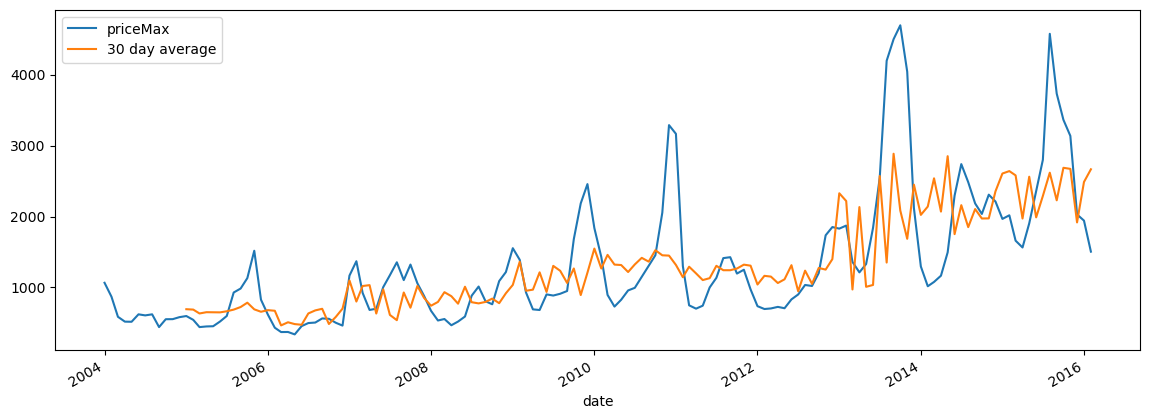

In [331]:
bangalore_df[['priceMax','30 day average']].plot(figsize=(14,5))